In [1]:
import os
import tensorflow as tf
tf.enable_eager_execution()
assert(tf.executing_eagerly)
import sys
sys.path.append("../")
from dataset_utils.tf_data_loader import ImageInputPipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Analyze Ferritic steel dataset

## Analyze train dataset

In [2]:
base_dir = "/mnt/sda/deep_learning/defect_segmentation/images/"
train_rel_map = {"images": "train", "labels": "label"}
assert(os.path.isdir(base_dir))

In [3]:
train_input_pipeline = ImageInputPipeline(train_rel_map, ".tif", base_dir, shuffle=False)

Number of examples in dataset:  3940


In [4]:
size = (256, 256)
num_pix_img = size[0] * size[1]
train_ds = train_input_pipeline._input_fn(size=size, batch_size=1, augment=False)

An example of how an image with defect area between 0.1% and 0.14% looks like:

0.115966796875


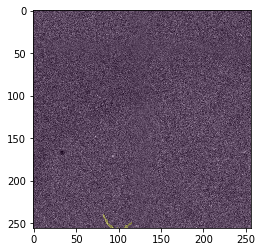

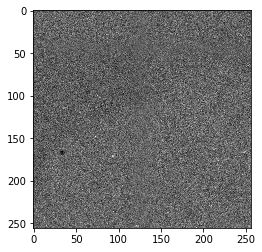

In [7]:
%matplotlib inline
for img, mask in train_ds:
    if (mask>0).numpy().sum() > 0:
        percent_defect = 100*((mask.numpy()>0).sum())/num_pix_img
        if percent_defect > 0.1 and percent_defect < 0.14:
            print(percent_defect)
            plt.imshow(img[0,...,0], cmap="gray")
            plt.imshow(mask[0,...,0], alpha=0.3)
            plt.figure()
            plt.imshow(img[0,...,0], cmap="gray")
            break

In [6]:
pix_sum_crack = []
pix_sum_ext = []
for img, mask in train_ds:
    pix_sum_crack.append((mask.numpy()==1).sum())
    pix_sum_ext.append((mask.numpy()==2).sum())

In [8]:
train_df = pd.DataFrame(zip(pix_sum_crack, pix_sum_ext), columns=("#pix_crack", "#pix_ext")).replace(0, np.nan)
train_df.head()

,#pix_crack,#pix_ext
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,15331.0


In [9]:
train_df["%pix_crack"] = np.where(pd.notna(train_df["#pix_crack"]), 100 * train_df["#pix_crack"]/num_pix_img, 0)
train_df["%pix_crack_na"] = 100 * train_df["#pix_crack"]/num_pix_img
train_df["%pix_ext"] = np.where(pd.notna(train_df["#pix_ext"]), 100 * train_df["#pix_ext"]/num_pix_img, 0)
train_df["%pix_ext_na"] = 100 * train_df["#pix_ext"]/num_pix_img
train_df.head()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
0,NaN,NaN,0.0,NaN,0.00000,NaN
1,NaN,NaN,0.0,NaN,0.00000,NaN
2,NaN,NaN,0.0,NaN,0.00000,NaN
3,NaN,NaN,0.0,NaN,0.00000,NaN
4,NaN,15331.0,0.0,NaN,23.39325,23.39325


The summary below shows that:

- Percentage of pixels with crack in the dataset is 0.06%
- Out of 3940 images, only 211 has crack in it
- If only images with cracks are considered, then the percentage of pixels with crack is 1.21%
- --
- Percentage of pixels with extrusion in the dataset is 2.34%
- Out of 3940 images, only 1328 has extrusion in it
- If only images with extrusions are considered, then the percentage of pixels with extrusion is 6.95%

In [10]:
train_df.describe()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
count,211.000000,1328.000000,3940.000000,211.000000,3940.000000,1328.000000
mean,795.180095,4557.408886,0.064979,1.213349,2.343905,6.954054
std,1651.915761,7140.641838,0.642935,2.520623,7.127617,10.895755
min,2.000000,1.000000,0.000000,0.003052,0.000000,0.001526
25%,44.500000,399.750000,0.000000,0.067902,0.000000,0.609970
50%,156.000000,1636.500000,0.000000,0.238037,0.000000,2.497101
75%,605.500000,5739.250000,0.000000,0.923920,0.629807,8.757401
max,8378.000000,53214.000000,12.783813,12.783813,81.198120,81.198120


The histogram below shows that 80% of the images with cracks have percentage of cracks in it in the range from 0 to 1.15%

(array([107., 135., 147., 163., 174., 178., 181., 183., 188., 190., 190.,
        192., 192., 192., 192., 192., 192., 192., 194., 194., 194., 194.,
        194., 194., 194., 196., 196., 197., 197., 200., 200., 201., 201.,
        201., 203., 203., 205., 205., 205., 205., 206., 207., 208., 208.,
        208., 208., 210., 210., 210., 211.]),
 array([3.05175781e-03, 2.58666992e-01, 5.14282227e-01, 7.69897461e-01,
        1.02551270e+00, 1.28112793e+00, 1.53674316e+00, 1.79235840e+00,
        2.04797363e+00, 2.30358887e+00, 2.55920410e+00, 2.81481934e+00,
        3.07043457e+00, 3.32604980e+00, 3.58166504e+00, 3.83728027e+00,
        4.09289551e+00, 4.34851074e+00, 4.60412598e+00, 4.85974121e+00,
        5.11535645e+00, 5.37097168e+00, 5.62658691e+00, 5.88220215e+00,
        6.13781738e+00, 6.39343262e+00, 6.64904785e+00, 6.90466309e+00,
        7.16027832e+00, 7.41589355e+00, 7.67150879e+00, 7.92712402e+00,
        8.18273926e+00, 8.43835449e+00, 8.69396973e+00, 8.94958496e+00,
        9.

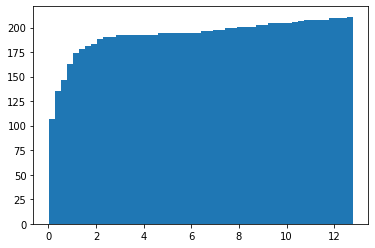

In [12]:
%matplotlib inline
plt.hist(train_df["%pix_crack_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 1.15 % image area for crack

In [ ]:
%matplotlib notebook
plt.hist(train_df["%pix_crack_na"], bins=50, cumulative=False, range=(0,1.15))

The histogram below shows that 80% of the images with extrusions have percentage of extrusion area in the image in the range from 0 to 10.75 %

In [ ]:
%matplotlib notebook
plt.hist(train_df["%pix_ext_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 10.75% image area for extrusions

In [ ]:
%matplotlib notebook
plt.hist(train_df["%pix_ext_na"], bins=50, cumulative=False, range=(0,10.75))

## Analyze test dataset

In [ ]:
base_dir = "/mnt/sda/deep_learning/CSE527_FinalProject-master/images"
test_rel_map = {"images": "test", "labels": "test_label"}
assert(os.path.isdir(base_dir))

In [ ]:
test_input_pipeline = ImageInputPipeline(test_rel_map, ".tif", base_dir, shuffle=False)

In [ ]:
size = (256, 256)
num_pix_img = size[0] * size[1]
test_ds = test_input_pipeline._input_fn(size=size, batch_size=1, augment=False)

An example of how an image with defect area between 0.1% and 0.14% looks like:

In [ ]:
%matplotlib notebook
for img, mask in test_ds:
    if (mask>0).numpy().sum() > 0:
        percent_defect = 100*((mask.numpy()>0).sum())/num_pix_img
        if percent_defect > 0.1 and percent_defect < 0.14:
            print(percent_defect)
            plt.imshow(img[0,...,0], cmap="gray")
            plt.imshow(mask[0,...,0], alpha=0.3)
            plt.figure()
            plt.imshow(img[0,...,0], cmap="gray")
            break

In [ ]:
pix_sum_crack = []
pix_sum_ext = []
for img, mask in test_ds:
    pix_sum_crack.append((mask.numpy()==1).sum())
    pix_sum_ext.append((mask.numpy()==2).sum())

In [ ]:
test_df = pd.DataFrame(zip(pix_sum_crack, pix_sum_ext), columns=("#pix_crack", "#pix_ext")).replace(0, np.nan)
test_df.head()

In [ ]:
test_df["%pix_crack"] = np.where(pd.notna(test_df["#pix_crack"]), 100 * test_df["#pix_crack"]/num_pix_img, 0)
test_df["%pix_crack_na"] = 100 * test_df["#pix_crack"]/num_pix_img
test_df["%pix_ext"] = np.where(pd.notna(test_df["#pix_ext"]), 100 * test_df["#pix_ext"]/num_pix_img, 0)
test_df["%pix_ext_na"] = 100 * test_df["#pix_ext"]/num_pix_img
test_df.head()

The summary below shows that:

- Percentage of pixels with crack in the dataset is 0.09%
- Out of 860 images, only 60 have cracks in it
- If only images with cracks are considered, then the percentage of pixels with crack is 1.39%
- --
- Percentage of pixels with extrusion in the dataset is 2.21%
- Out of 860 images, only 295 have extrusions in it
- If only images with extrusions are considered, then the percentage of pixels with extrusion is 6.43%

In [ ]:
test_df.describe()

The histogram below shows that 80% of the images with cracks have percentage of cracks in it in the range from 0 to 1.2%

In [ ]:
%matplotlib notebook
plt.hist(test_df["%pix_crack_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 1.2 % image area for crack

In [ ]:
%matplotlib notebook
plt.hist(test_df["%pix_crack_na"], bins=50, cumulative=False, range=(0,1.2))

The histogram below shows that 80% of the images with extrusions have percentage of extrusion area in the image in the range from 0 to 10

In [ ]:
%matplotlib notebook
plt.hist(test_df["%pix_ext_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 10 % image area for extrusions

In [ ]:
%matplotlib notebook
plt.hist(test_df["%pix_ext_na"], bins=50, cumulative=False, range=(0,10))